In [1]:
!nvidia-smi

Tue Feb 27 15:31:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# !pip install ultralytics

In [1]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="*********")
# project = rf.workspace("datasciencepotholedetecion").project("pothole-detection-xn9ay")
# dataset = project.version(3).download("yolov8")


In [3]:
from ultralytics import YOLO
import os
from IPython.display import display,Image

In [5]:
!yolo task =detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 304MB/s]
Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Pothole-Detection-3/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save

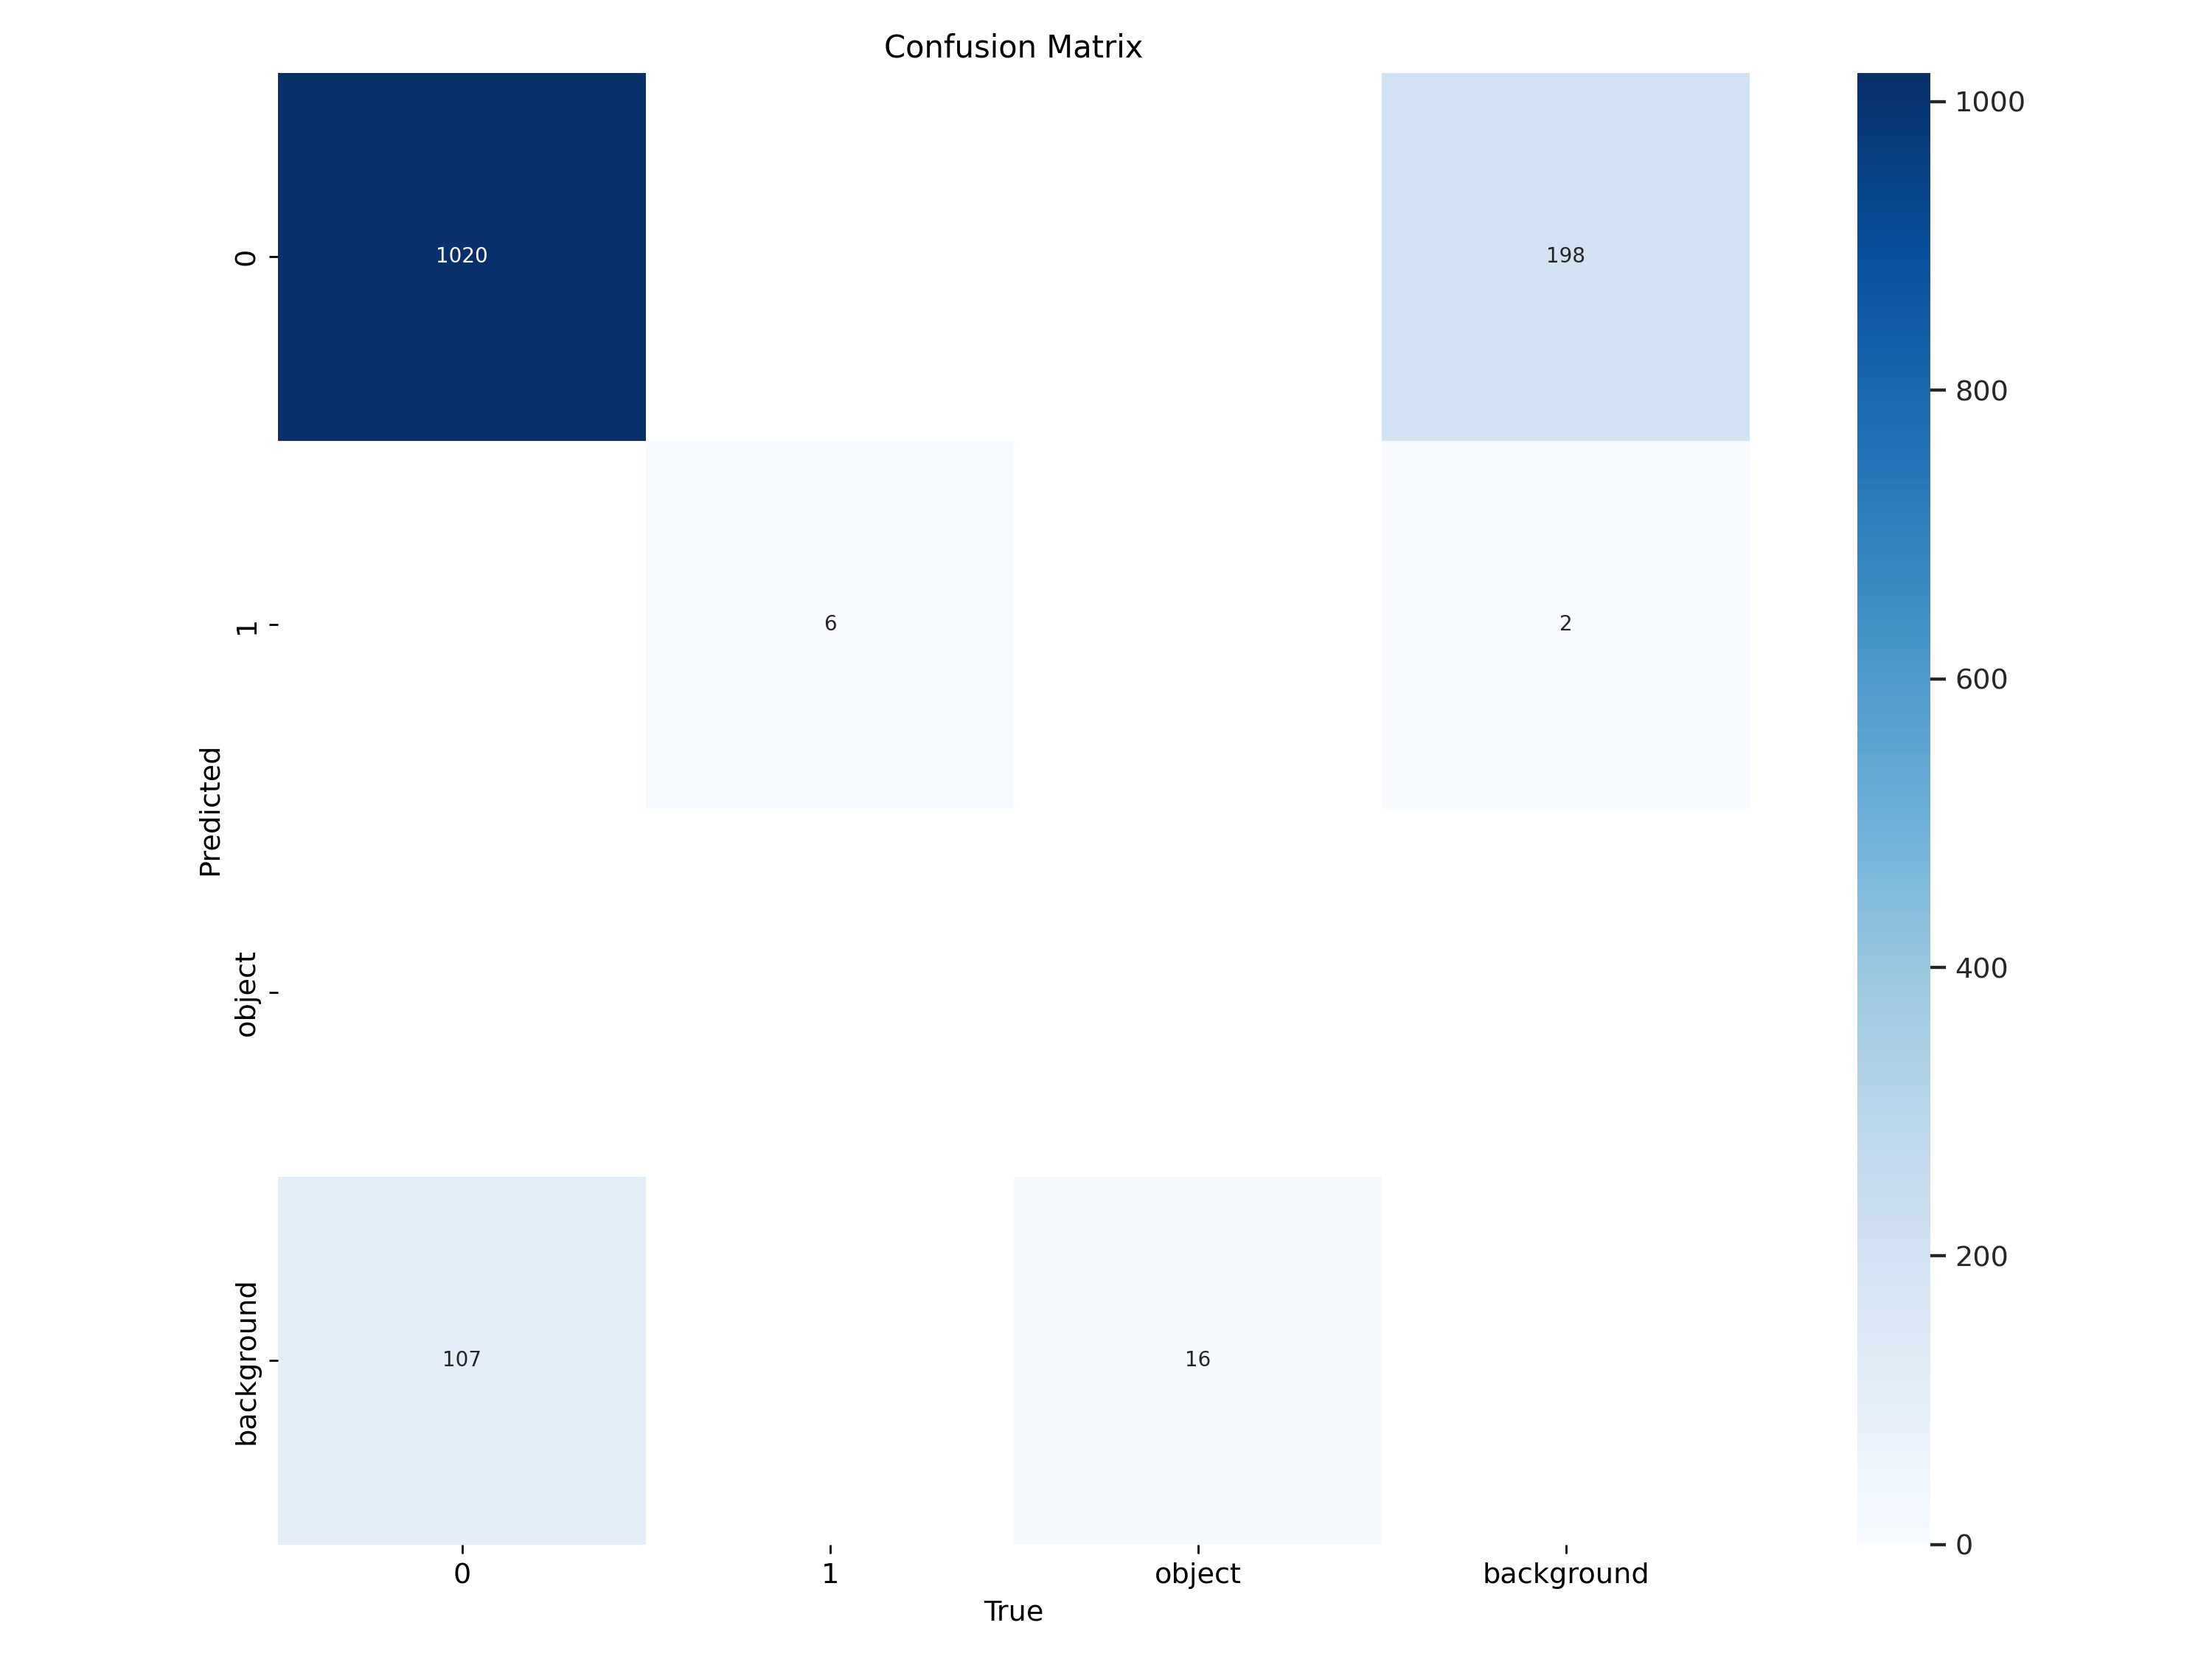

In [6]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png')

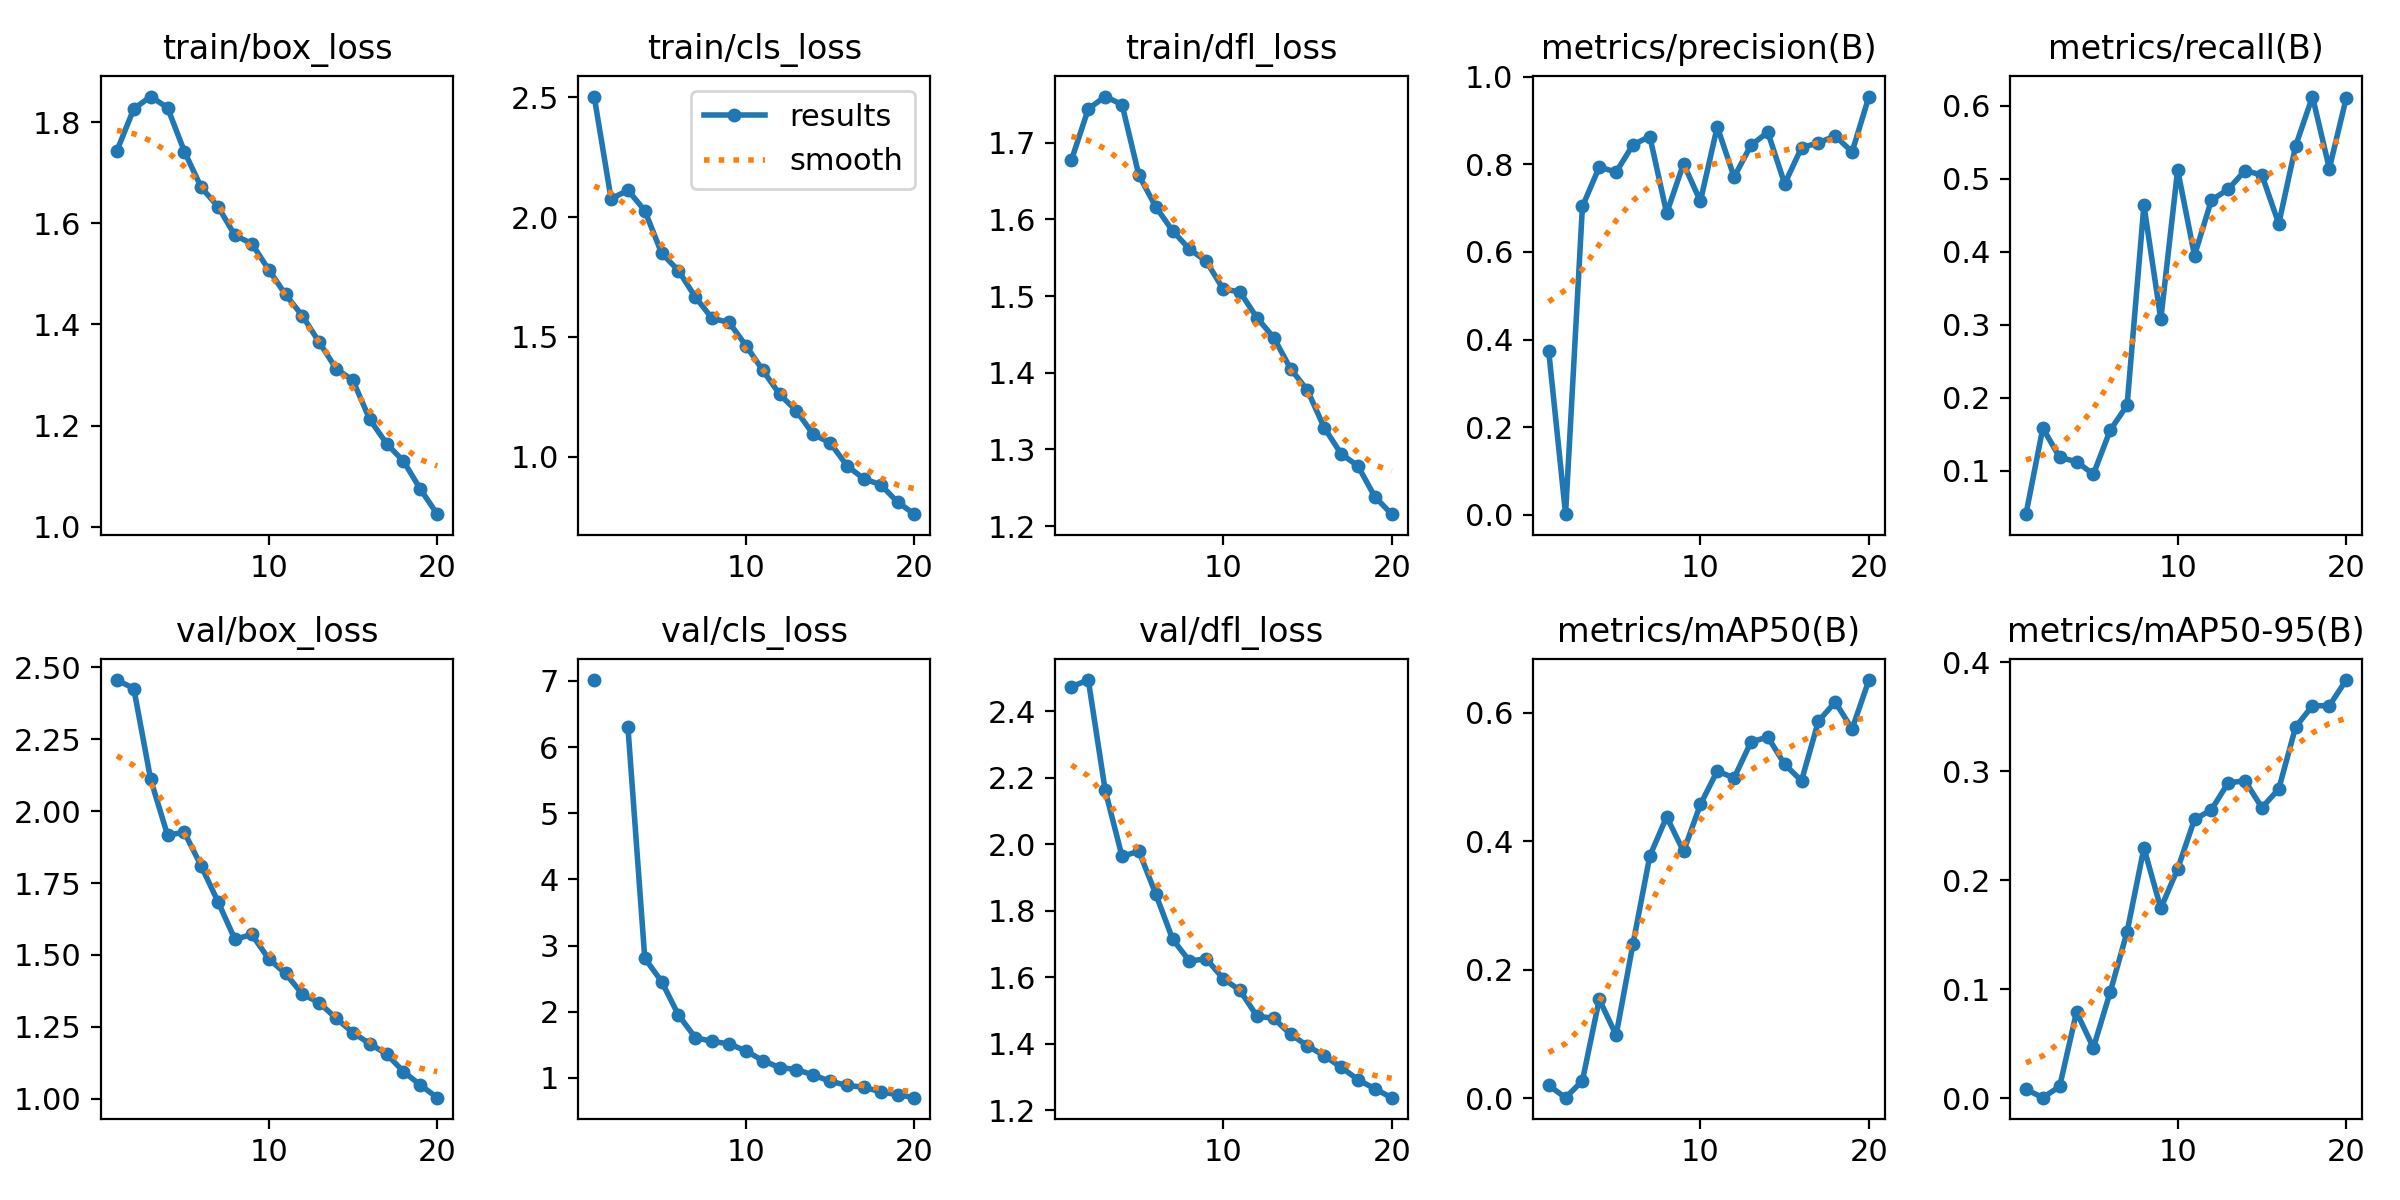

In [7]:
Image(filename=f'/content/runs/detect/train/results.png')

In [8]:
!yolo task =detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Pothole-Detection-3/valid/labels.cache... 499 images, 13 backgrounds, 0 corrupt: 100% 499/499 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1124, len(boxes) = 1149. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 32/32 [00:15<00:00,  2.00it/s]
                   all        499       1149      0.955       0.61      0.651      0.383
                     0        499       1127      0.865       0.88       0.92      0.671
                     1        499          6          1       0.95      0.995       0.45
                object        4

In [9]:
!yolo task =detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.3 source={dataset.location}/test/images

Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs

image 1/251 /content/Pothole-Detection-3/test/images/0000149_jpg.rf.cd00548a043201188934d36b497e5c77.jpg: 640x640 1 0, 37.1ms
image 2/251 /content/Pothole-Detection-3/test/images/0000855_jpg.rf.f00a08ef84328cc5dfdc7296a6c3e51f.jpg: 640x640 1 0, 37.1ms
image 3/251 /content/Pothole-Detection-3/test/images/000162_r_jpg.rf.ba2472f92fe2c96854e449201ceb70de.jpg: 640x640 1 0, 37.0ms
image 4/251 /content/Pothole-Detection-3/test/images/0001721_jpg.rf.a44f6e7eb20693f6be5ab171f4e63a35.jpg: 640x640 1 0, 35.4ms
image 5/251 /content/Pothole-Detection-3/test/images/0001935_jpg.rf.77037af0174f1098077c2fc0b7367eaf.jpg: 640x640 1 1, 34.7ms
image 6/251 /content/Pothole-Detection-3/test/images/0002393_jpg.rf.29afa1267b48a2269bac09ba66f91cd7.jpg: 640x640 (no detections), 34.7ms
image 7/251 /content/Pothole-Detection-3/test/images/0002910_j

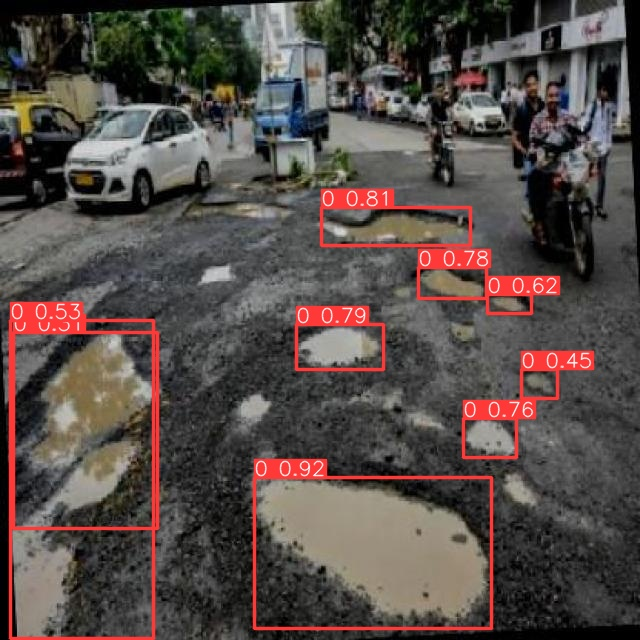

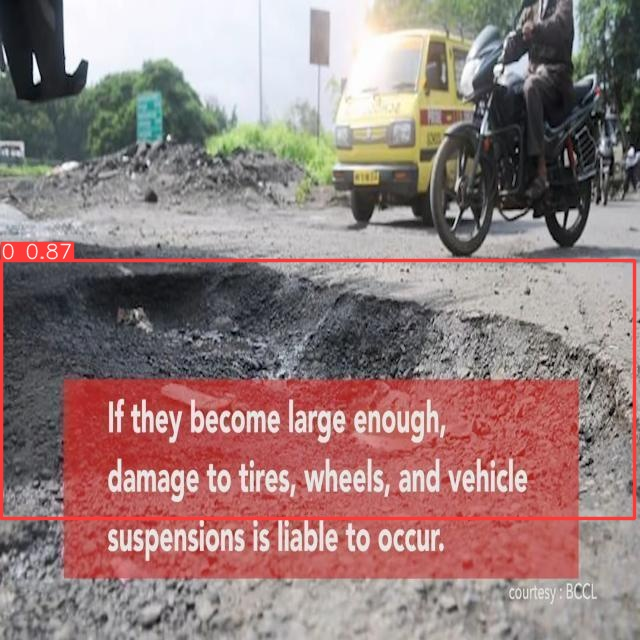

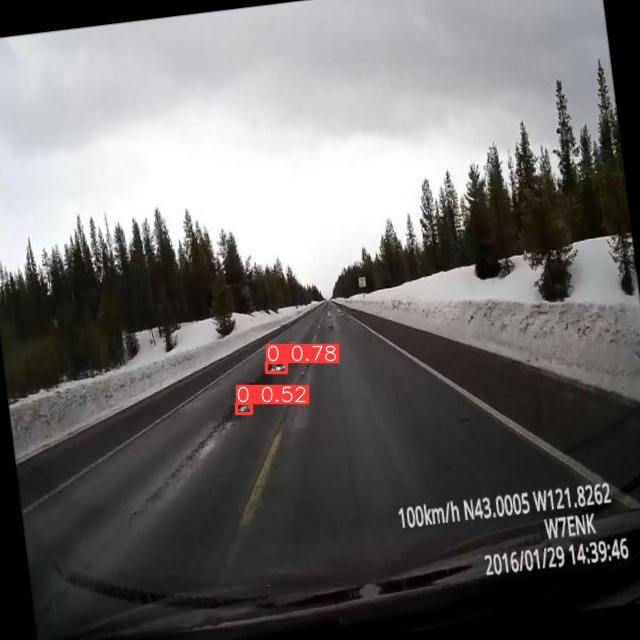

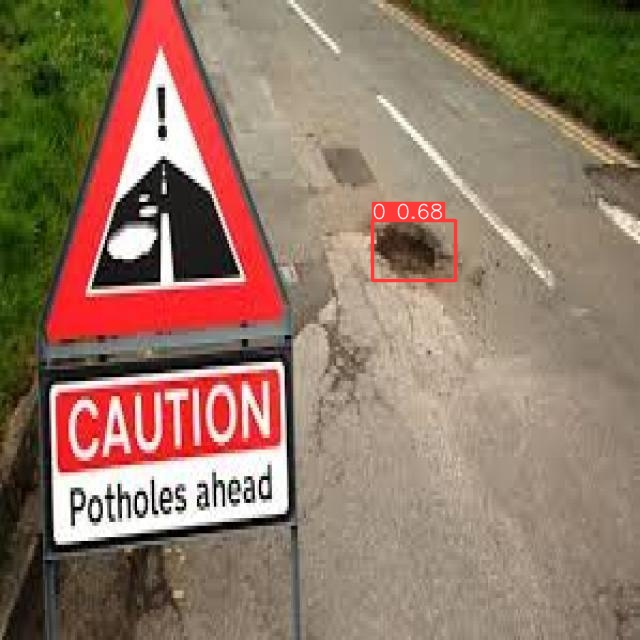

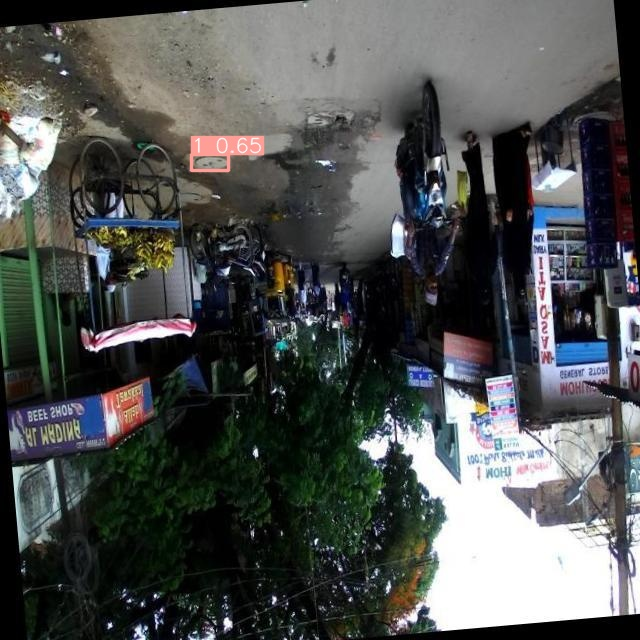

In [10]:
import glob
from IPython.display import Image,display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:5]:
  display(Image(filename=image_path, height =600))
  print("\n")